In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

Untar the data at location `URLS.PETS` and save the path to the variable `path`.

In [4]:
path = untar_data(URLs.PETS); path

PosixPath('/home/paperspace/.fastai/data/oxford-iiit-pet')

Show the contents at `path`.

In [5]:
path.ls()

[PosixPath('/home/paperspace/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/paperspace/.fastai/data/oxford-iiit-pet/annotations')]

Create `Path` objects at `path/'annotations'` and `path/'images'`.

In [6]:
path_anno = path/'annotations'
path_img = path/'images'

Get all of the image file names from `path_img`. Print the first five.

In [7]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/paperspace/.fastai/data/oxford-iiit-pet/images/Bombay_70.jpg'),
 PosixPath('/home/paperspace/.fastai/data/oxford-iiit-pet/images/pug_169.jpg'),
 PosixPath('/home/paperspace/.fastai/data/oxford-iiit-pet/images/Ragdoll_96.jpg'),
 PosixPath('/home/paperspace/.fastai/data/oxford-iiit-pet/images/boxer_43.jpg'),
 PosixPath('/home/paperspace/.fastai/data/oxford-iiit-pet/images/scottish_terrier_4.jpg')]

In [8]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

Get a `ImageDataBunch` object using regex on the filenames from the data in `path_img`. Save it to a variable called `data`. Call `normalize(imagenet_stats)` on this object to ensure that it's properly normalized.

In [9]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

Show a batch of data over 3 rows, with figsize (7,6).

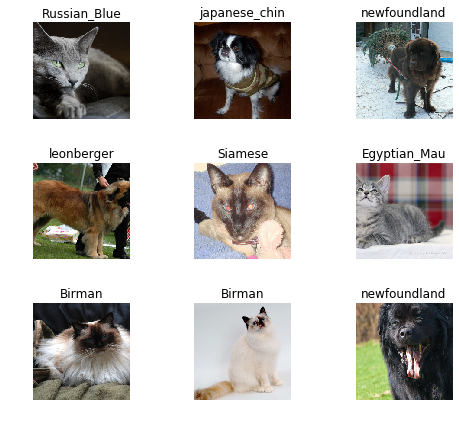

In [13]:
data.show_batch(rows=3, figsize=(7,6))

In [16]:
doc(data.show_batch)

In [14]:
doc(data.show_batch)

Print the data classes and the number of data classes.

In [19]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

## Training: resnet34

Create a ResNet34 CNN learner object. Your metric should be `error_rate`. 

In [20]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Print out the contents of the learner.

In [22]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

Fit the learner for a cycle consisting of four epochs. Try to get below 0.07 error.

In [23]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.374653,0.313554,0.087280
2,0.548615,0.244694,0.083221
3,0.331707,0.194041,0.059540
4,0.253645,0.194538,0.059540


Save your learner to 'stage-1'.

In [15]:
learn.save('stage-1')

## Results

Use the create a ClassificationInterpretation object from the learning object you created above. Get the losses and their indexes. Ensure that the length of your losses is equivalent to the length of your validation set.

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

In [17]:
doc(ClassificationInterpretation.top_losses)

Plot the 9 top losses with a figure size of (15,11).

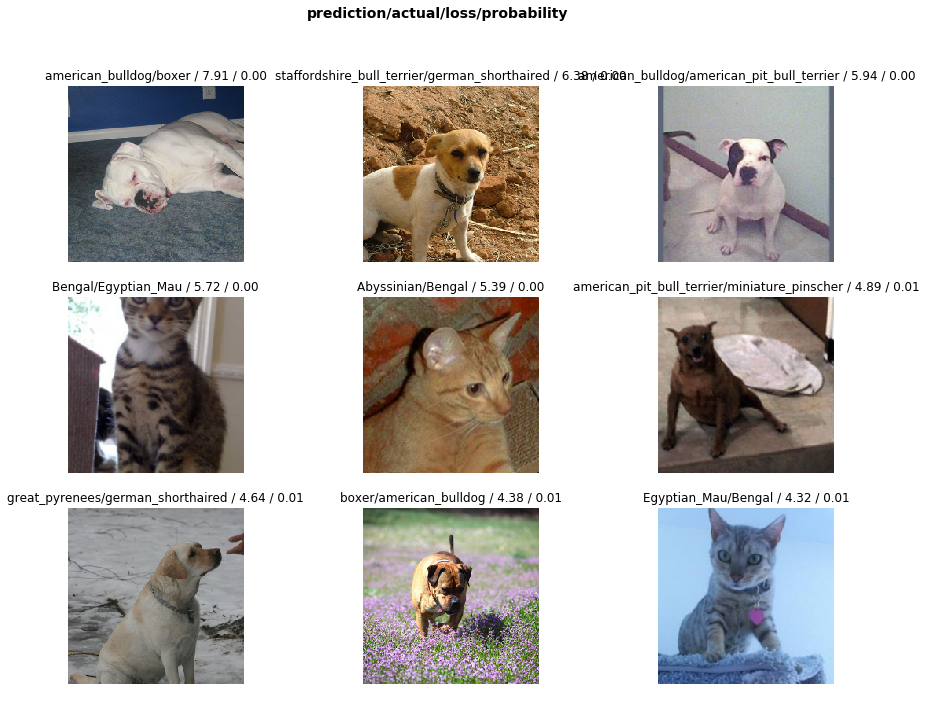

In [18]:
interp.plot_top_losses(9, figsize=(15,11))

In [19]:
doc(interp.plot_top_losses)

Plot a confusion matrix of `figsize` (12,12) with `dpi=60`.

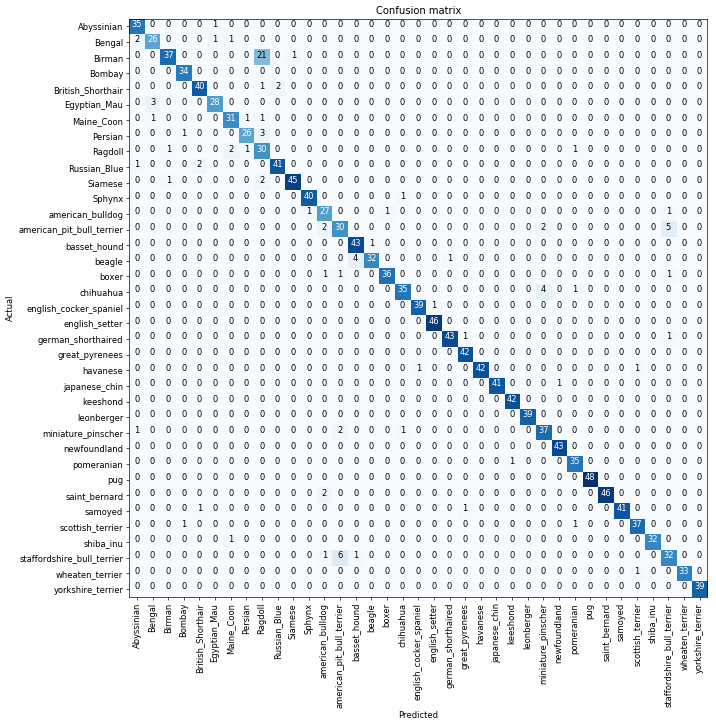

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [22]:
doc(interp.most_confused)

List out the most confused classes with a minimum of at least two confused examples.

In [21]:
interp.most_confused(min_val=2)

[('Birman', 'Ragdoll', 21),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('beagle', 'basset_hound', 4),
 ('chihuahua', 'miniature_pinscher', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Persian', 'Ragdoll', 3)]

## Unfreezing, fine-tuning, and learning rates

Unfreeze the model.

In [27]:
learn.unfreeze()

Fit a cycle unfrozen.

In [25]:
# learn.fit_one_cycle(1)

In [24]:
# learn.load('stage-1');

Use the learning rate finder to figure out which learning rate to continue at. 

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Plot the results of the learning rate finder.

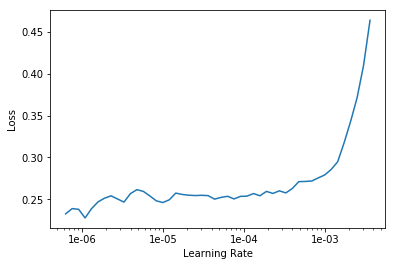

In [27]:
learn.recorder.plot()

In [28]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.244058,0.194245,0.064953
2,0.219058,0.189708,0.062246


That's a pretty accurate model!

## Training: resnet50

Create a new normalized dataset with half the batch size (since the new model architecture is bigger and more expensive.

In [29]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

Create a CNN with the `resnet50` architecture, with the `error_rate` metric.

In [33]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

Run and plot the results of `lr_find()`.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


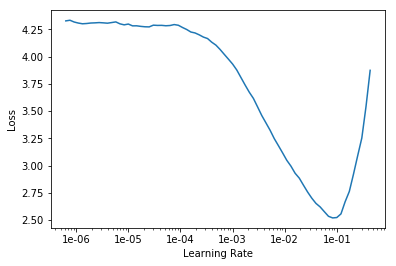

In [34]:
learn.lr_find()
learn.recorder.plot()

Fit a cycle (8 epochs is a good length).

In [35]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate
1,0.722888,0.246330,0.073748
2,0.402420,0.223737,0.076455
3,0.336407,0.224066,0.077131
4,0.257902,0.166792,0.051421
5,0.212982,0.172253,0.052097
6,0.141774,0.139008,0.052097
7,0.102289,0.134366,0.043978
8,0.094638,0.136497,0.043302


Save it to `stage-1-50`.

In [36]:
learn.save('stage-1-50')

Unfreeze it and fit another cycle of 3 epochs. You should be able to get ~4.4% error.

In [37]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.120191,0.134204,0.042625
2,0.090727,0.137236,0.043978
3,0.078409,0.129524,0.044655


If it's better than the previous model, save it as a new file. If not, just load the weights from the previous version.

In [40]:
learn.load('stage-1-50');

Create an interpreter.

In [41]:
interp = ClassificationInterpretation.from_learner(learn)

Check out the most confused examples.

In [42]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('chihuahua', 'miniature_pinscher', 3)]

## Other data formats

Open the `MNIST` dataset.

In [41]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/home/paperspace/.fastai/data/mnist_sample')

Create a `tfms` object that does everything except flipping.

Create a dataset from the folder layout for `MNIST`.

In [42]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

Show a batch (3 rows, figsize=(5,5)).

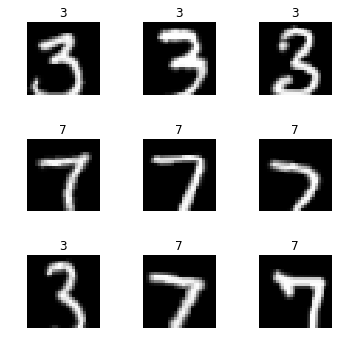

In [43]:
data.show_batch(rows=3, figsize=(5,5))

Create a cnn and fit it w/ two epochs (resnet18, accuracy metric).

In [44]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/paperspace/.torch/models/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:02<00:00, 19535575.02it/s]


epoch,train_loss,valid_loss,accuracy
1,0.196624,0.082277,0.969578
2,0.117889,0.038059,0.985770


Create a csv from the `labels.csv` file.

In [45]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


Create a dataset from the csv directly.

In [46]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

Show a batch and the classes.

[0, 1]

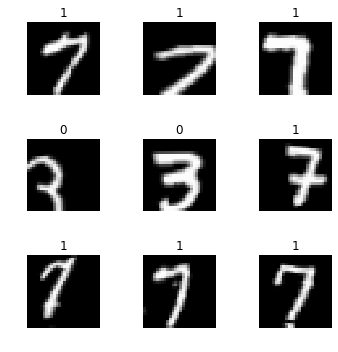

In [47]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

Create a dataset from the dataframe that you created earlier (and the tfms you defined earlier).

In [48]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

Construct a list of all the file paths from the dataframe you created above.

In [49]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/home/paperspace/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/home/paperspace/.fastai/data/mnist_sample/train/3/21102.png')]

Create a dataset from the  regex pattern defined below (and the tfms defined above). Show the classes to demonstrate that it's correct.

In [50]:
pat = r"/(\d)/\d+\.png$"

In [51]:
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

Create a dataset from a function that looks for a '3' or a '7' in the filename. Show the classes to demonstrate that it's correct.

In [53]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

Create a list of labels from the list of paths you created above.

In [54]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

Create a dataset by passing the paths and the labels.

In [55]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']